# Evaluation of model

In [13]:
# For running on Colab you need to install the following libraries :
!pip install datasets transformers

## Using Hugging Face Metric implementation

First I will use huggingFace libraries to load the fine-tuned model and then evaluate it on test set with the metrics : accuracy, precision, recall and f1-score.

In [14]:
from datasets import load_dataset, load_metric
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Load Test Dataset
testset = load_dataset('gnad10')['test']

# Load Fine-tuned Model
MODEL_PATH = "Mathking/bert-base-german-cased-gnad10"
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)

Using custom data configuration default
Reusing dataset gnad10 (/root/.cache/huggingface/datasets/gnad10/default/1.1.0/3a8445be65795ad88270af4d797034c3d99f70f8352ca658c586faf1cf960881)


  0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
# Tokenize test set
encoded_testset = testset.map(lambda examples: tokenizer(examples['text'], truncation=True, padding='max_length'), batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [17]:
# Use trainer for prediction on test set
trainer = Trainer(model=model)
results = trainer.predict(encoded_testset)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 1028
  Batch size = 8


In [21]:
y_pred = np.argmax(results.predictions, axis=-1)
y_true = testset['label']
# Getting label mappings
target_names = testset.features['label'].names

In [22]:
# Print the precision and recall, among other metrics
print(classification_report(y_true, y_pred, digits=3, target_names=target_names))

               precision    recall  f1-score   support

          Web      0.965     0.976     0.970       168
     Panorama      0.803     0.899     0.848       168
International      0.934     0.848     0.889       151
   Wirtschaft      0.907     0.901     0.904       141
        Sport      0.992     0.992     0.992       120
       Inland      0.883     0.814     0.847       102
         Etat      0.921     0.866     0.892        67
 Wissenschaft      0.852     0.912     0.881        57
       Kultur      0.891     0.907     0.899        54

     accuracy                          0.906      1028
    macro avg      0.905     0.902     0.903      1028
 weighted avg      0.908     0.906     0.906      1028



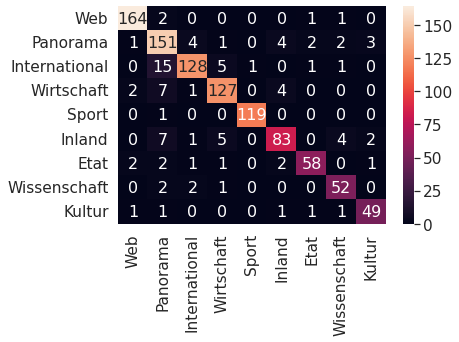

In [23]:

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, target_names, target_names)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
plt.show()

In the end, the trained model performs a good accuracy: 90.6% and even the predictions seems to be good all labels despite the unbalanced classes (the results are close to what I expected as the authors of the model had a 90.5% accuracy on this task)